# 컴퓨터공학부 201502755 김미연
# 중간고사 대체 과제 - <csv와 html에서 데이터 읽고 그래프 그리기>

## 대체 과제 1번. csv 파일 읽기 & 그래프 그리기
**'인천광역시 여성 취업 장애요인'**이라는 csv 파일을 과제에 이용했습니다.
* 이번 학기가 저의 대학교 마지막 학기입니다. 졸업 및 취업을 앞두고 있어서 취업과 관련된 내용을 과제에 녹여보고 싶었습니다. 그러던 중, 제 개인적인 관심사인 **취업**과 제가 살고 있는 **부평구**, 그리고 **여성 취업 장애요인**이라는 내용들이 한 번에 들어있는 csv 파일을 공공 데이터 포털에서 발견하게 되었습니다.


* 해당 csv 파일에는 인천광역시 여성 취업 장애요인이 무엇일지를 설문한 결과가 백분율로 환산하여 담겨있고, 이 자료가 군구별, 성별, 연령별, 학력별 ... 등등으로 분류가 되어있어서 그래프를 그려보고 각 분류에 대해서 비교를 해보기에 최적화된 데이터라고 생각했습니다.


* 저는 많은 분류 중에서 **군구별, 성별, 연령별** 자료의 비교를 해보기로 결정했습니다.

### csv 데이터 가져오기 & 그래프를 그리기 위해 가공하기
코드에 대한 구체적인 설명은 주석으로 달아놓았습니다.

In [6]:
import csv

# csv 파일 열기.
f = open('인천광역시_여성취업 장애요인_20200421.csv', 'r')
data = csv.reader(f)

header = next(data)
factors = []

# header에 있는 투표 항목을 뽑아서 factors list에 넣기. 추후 그래프를 그릴 때 사용합니다.
for i in range(2, len(header)):
    factors.append(header[i])
    
# 각 투표 항목에 대한 군구별 득표율 평균을 저장할 percentage_average list 생성.
# 평균을 내기 위해서는 모든 군구별 득표율을 더해준 후 군구의 수로 나눠야 하므로 0으로 초기화.
percentage_average = [0, 0, 0, 0, 0, 0]

# 각 투표 항목에 대한 부평구의 득표율 평균을 저장할 percentage_average list 생성.
percentage_bupyeong = []

# 각 투표 항목에 대한 연령별 득표율 평균을 저장할 list들 생성.
percentage_10s = []
percentage_20s = []
percentage_30s = []
percentage_40s = []
percentage_50s = []
percentage_over_60s = []

# 각 투표 항목에 대한 성별 득표율 평균을 저장할 list들 생성.
percentage_male = []
percentage_female = []

# average 계산 시, 나눠줄 모든 인천의 군구 count.
count = 0

# 데이터 추출
for row in data:
    # 군구별 데이터 추출
    if row[0] == '군구별':
        count += 1
        # 군구별 득표율 평균을 내기 위해 일단 각 군구별 득표율을 float형으로 변환하여 더해줌.
        for i in range(0, len(percentage_average)):
            percentage_average[i] += float(row[i+2])
        # 부평구 득표율 저장.
        if row[1] == '부평구':
            for i in range(2, len(row)):
                percentage_bupyeong.append(float(row[i]))
            
    # 연령별 데이터 추출
    elif row[0] == '연령별':
        if row[1] == '13~19세':
            for i in range(2, len(row)):
                percentage_10s.append(float(row[i]))
        elif row[1] == '20~29세':
            for i in range(2, len(row)):
                percentage_20s.append(float(row[i]))
        elif row[1] == '30~39세':
            for i in range(2, len(row)):
                percentage_30s.append(float(row[i]))
        elif row[1] == '40~49세':
            for i in range(2, len(row)):
                percentage_40s.append(float(row[i]))
        elif row[1] == '50~59세':
            for i in range(2, len(row)):
                percentage_50s.append(float(row[i]))
        else:
            for i in range(2, len(row)):
                percentage_over_60s.append(float(row[i])) 
    
    # 성별 데이터 추출
    elif row[0] == '성별':
        if row[1] == '남자':
            for i in range(2, len(row)):
                percentage_male.append(float(row[i]))
        else:
            for i in range(2, len(row)):
                percentage_female.append(float(row[i]))

# 각 군구별 득표율을 항목별로 더해준 것을 ocunt로 나눠서 저장해줌.
# 항아리 모양 그래프를 그리기 위해 음수를 취해줌.
for i in range(0, len(percentage_average)):
    percentage_average[i] /= count
    percentage_average[i] = -(percentage_average[i])

### 부평구의 여성 취업 장애요인 그래프 그리기
부평구의 여성 취업 장애요인 각 항목별 득표율을 파이 차트를 활용해 표현해보았습니다.

육아부담 또는 가사부담이 여성 취업 장애요인 중 가장 많은 비율을 차지하고 있는 것을 확인해볼 수 있었습니다.

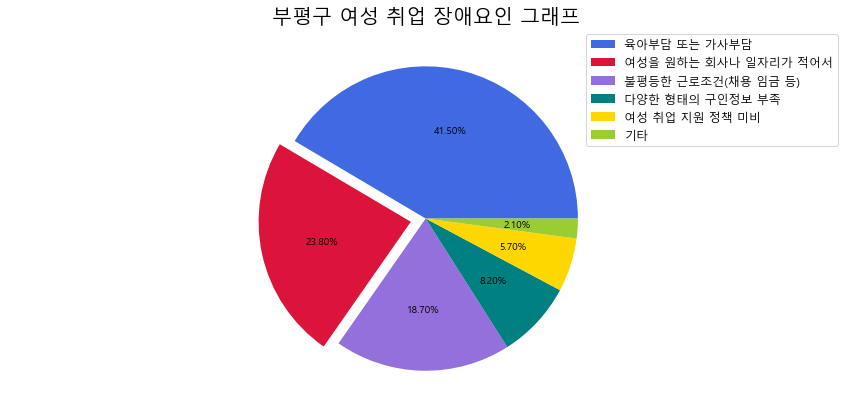

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.rc('font', family = 'Malgun Gothic')
plt.title('부평구 여성 취업 장애요인 그래프', size=20)
plt.axis('equal')

# 구분이 쉬운 색상들로 직접 지정하여 사용.
color = ['royalblue', 'crimson', 'mediumpurple', 'teal', 'gold', 'yellowgreen']
exp = (0, 0.1, 0, 0, 0, 0)

plt.pie(percentage_bupyeong, autopct='%.2f%%', colors=color, explode=exp)
plt.legend(factors, fontsize=12)

plt.show()

### 부평구의 여성 취업 장애요인을 인천 평균과 비교해보기
**항아리 모양 그래프**를 이용하여 부평구의 여성 취업 장애요인 각 항목별 득표율과 군구별 평균 득표율 데이터를 비교해보았습니다.

전체적으로 비슷한 득표율 양상을 보였지만, **여성 취업 지원 정책 미비**와 **다양한 형태의 구인정보 부족** 항목에 대해서 부평구가 평균보다 높은 득표율을 보인 것을 알 수 있었습니다. 

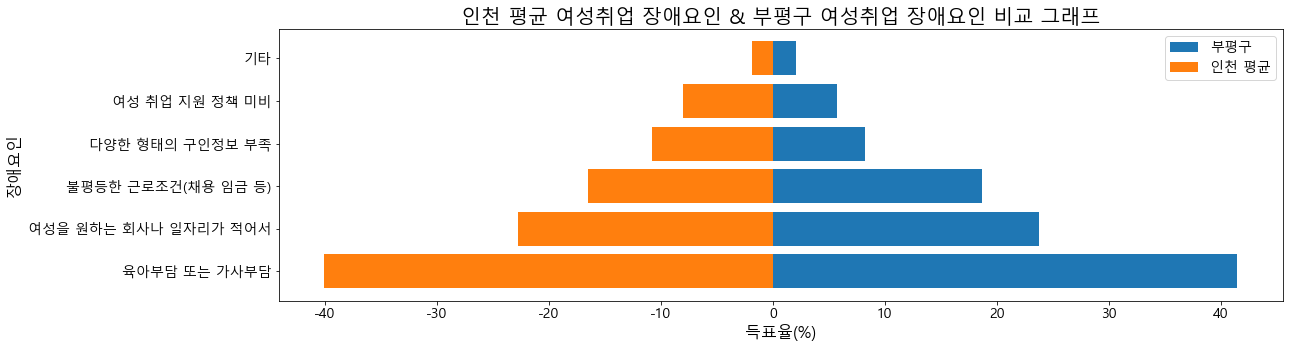

In [8]:
plt.figure(figsize=(18,5))
plt.title('인천 평균 여성취업 장애요인 & 부평구 여성취업 장애요인 비교 그래프', size=20)

plt.rcParams['axes.unicode_minus'] = False
plt.barh(factors, percentage_bupyeong, label='부평구')
plt.barh(factors, percentage_average, label='인천 평균')

plt.xlabel('득표율(%)', fontsize=16)
plt.ylabel('장애요인', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

### 인천시의 여성 취업 장애요인 설문조사 득표율을 연령별로 비교해보기
**막대 그래프**를 이용하여 연령별로 여성 취업 장애요인에 대해 어떻게 생각하는지를 비교해보았습니다.

득표율 순위 자체에는 큰 차이가 없어보였지만, **30대** 투표 참여자들이 **육아부담 또는 가사부담** 항목에 다른 연령대보다 특히 더 많이 투표한 것을 확인할 수 있었습니다. 반면, **10대** 투표 참여자들은 해당 항목보다는 다른 항목들에 많은 표를 행사한 것으로 관찰되었습니다.

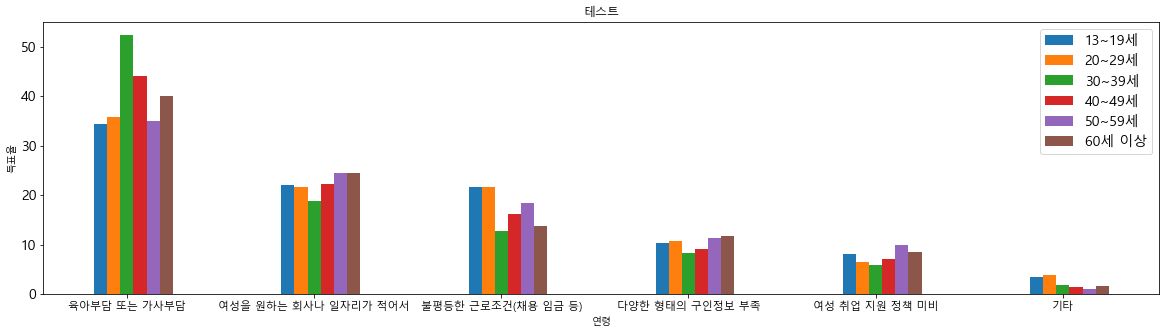

In [9]:
import numpy

age = ['13~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60세 이상']

plt.figure(figsize=(20,5))
plt.title('테스트')

x = numpy.arange(len(factors))

plt.bar(x-0.14, percentage_10s, label='13~19세', width=0.07)
plt.bar(x-0.07, percentage_20s, label='20~29세', width=0.07)
plt.bar(x-0.0, percentage_30s, label='30~39세', width=0.07)
plt.bar(x+0.07, percentage_40s, label='40~49세', width=0.07)
plt.bar(x+0.14, percentage_50s, label='50~59세', width=0.07)
plt.bar(x+0.21, percentage_over_60s, label='60세 이상', width=0.07)

plt.xticks(x, factors, fontsize=11)
plt.yticks(fontsize=14)

plt.legend(age, fontsize=14)
plt.xlabel('연령')
plt.ylabel('득표율')
plt.show()

### 인천시의 여성 취업 장애요인 설문조사 득표율을 성별로 비교해보기
**꺾은선 그래프**를 이용하여 성별로 여성 취업 장애요인에 대해 어떻게 생각하는지를 비교해보았습니다.

득표율 양상에 큰 차이는 없어보였습니다.

하지만 여성들이 남성들보다 **불평등한 근로 조건(채용 임금 등)**이 여성 취업의 장애요인이라고 생각하는 비율이 조금 더 많았습니다.

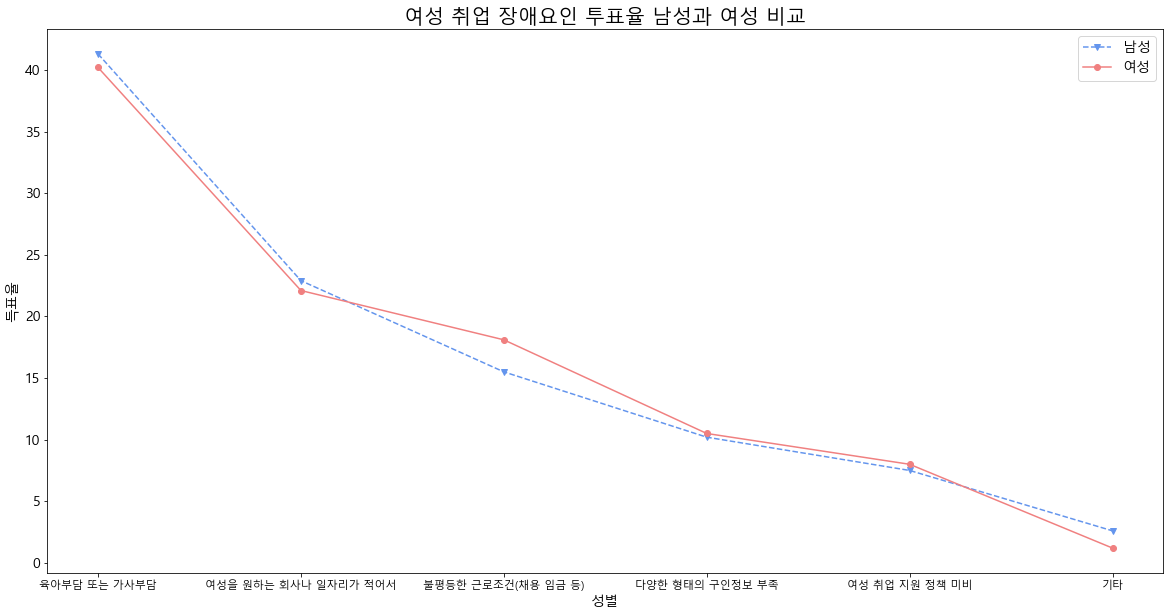

In [10]:
plt.figure(figsize=(20, 10))
plt.title('여성 취업 장애요인 투표율 남성과 여성 비교', size=20)

plt.plot(factors, percentage_male, color='cornflowerblue', ls='--', marker='v', label='남성')
plt.plot(factors, percentage_female, color='lightcoral', marker='o', label='여성')

plt.legend(loc=1, fontsize=14)
plt.xlabel('성별', fontsize=14)
plt.ylabel('득표율', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=14)
plt.show()

## 대체 과제 2번. html 안의 테이블 데이터 읽기 & 그래프 그리기
**위키피디아의 'List of best-selling music artists'** 라는 문서에서 table을 추출했습니다.
* 개인적으로 **ABBA**라는 스웨덴의 혼성 팝 그룹을 너무나도 좋아합니다. 어렸을 때부터 부모님께서 틀어주시는 ABBA의 노래를 들으며 자라왔고, 성인이 된 지금도 그들의 노래를 들으며 용기를 얻고, 위로를 받기도 합니다. 저는 평소와 같이 ABBA의 노래를 들으며 이번 과제를 하고 있었습니다. 그러다 문득, '내가 좋아하는 가수인 ABBA는 세계적으로 얼마나 유명할까?' 하는 의문이 머리를 스쳤습니다. 가수의 유명도를 객관적으로 측정할 수 있는 척도는 **앨범 판매량**이 아닐까, 하는 생각에 해당 위키피디아 문서를 보게 되었습니다.


* **'List of best-selling music artists'(https://en.wikipedia.org/wiki/List_of_best-selling_music_artists)** 문서에는 세계적인 가수들의 앨범 판매량을 일정 판매량 단위로 끊어서 테이블화 시켜놓고 있었습니다. 이 테이블에는 **가수들의 국적, 활동 기간, 음반 차트 첫 진입 년도, 음악의 장르, 음반 판매량 인증(인증 기관에서 공식으로 count한 판매량), 알려진 판매량**이 column으로 존재하고 있었습니다.


* **음반 판매량 인증**과 **알려진 판매량** column만 분류해, 데이터 시각화를 진행해보았습니다.

### html 안의 테이블 데이터 읽기 & 그래프를 그리기 위해 가공하기
List of best-selling music artists의 **음반 판매량 인증** column과 **알려진 판매량** column에는 숫자만 들어가 있는 것이 아닌, string 형식으로 다른 정보들도 포함하고 있어서 따로 가공을 하는 것이 필요했습니다.

음반 판매량 인증 항목의 경우, **'Total available certified units: 281.3 million'** 와 같은 식으로 데이터가 구성이 되어있습니다. 저는 여기서 281.3이라는 float형 숫자만을 추출해내야 했습니다. 이 때, 각 row별로 split을 이용해서 **': '** 을 기준으로 한 번 split하여 1번째 항목을 가져오고,(281.3 million 부분만 남음) 여기서 한 번 더 공백을 기준으로 split을 진행해 0번째 항목을 가져와 281.3 이라는 string만 뽑아낸 후, **float**로 형변환 해준 결과로 데이터를 갱신해주는 방법을 택했습니다.

알려진 판매량 항목 역시 split을 이용해 숫자만 추출해냈습니다.

그 외 코드에 대한 구체적인 설명은 주석으로 달아놓았습니다.

In [12]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_best-selling_music_artists"

df = pd.read_html(url)
df = pd.read_html(url, header=0, index_col=0)

# 슬라이싱을 활용하여 '음반 판매량 인증'과 '알려진 판매량'에 대한 데이터만 추출.
# 판매량 top 가수들에 대한 table(250 million or more records) 추출.
# copy()라는 메소드를 이용해, 원본 DataFrame을 수정하려 한다는 경고를 제거했습니다.
first_table = df[0].iloc[:, 4:6].copy()

# 영어로 되어있는 column명을 번역하여 가독성 높이기.
first_table.columns = ['음반 판매량 인증', '알려진 판매량']

# ABBA가 속해있는 table(120 million to 199 million records) 추출.
abba_table = df[2].iloc[:, 4:6].copy()
abba_table.columns = ['음반 판매량 인증', '알려진 판매량']

# 그래프를 그리는 데에 필요한 데이터(숫자)만 추출하기.
for i in range(len(first_table)):
    first_table['음반 판매량 인증'][i] = first_table['음반 판매량 인증'][i].split(': ')[1]
    first_table['음반 판매량 인증'][i] = (float)(first_table['음반 판매량 인증'][i].split(' ')[0])
    first_table['알려진 판매량'][i] = (float)(first_table['알려진 판매량'][i].split(' ')[0])
    
for i in range(len(abba_table)):   
    abba_table['음반 판매량 인증'][i] = abba_table['음반 판매량 인증'][i].split(': ')[1]
    abba_table['음반 판매량 인증'][i] = (float)(abba_table['음반 판매량 인증'][i].split(' ')[0])
    abba_table['알려진 판매량'][i] = (float)(abba_table['알려진 판매량'][i].split(' ')[0])
    
# '알려진 판매량' 항목을 기준으로 내림차순 정렬하기.
first_table = first_table.sort_values(by=['알려진 판매량'], ascending=False)
abba_table = abba_table.sort_values(by=['알려진 판매량'], ascending=False)

### 추출한 데이터 csv 파일로 저장하기
csv 파일로 저장하는 것은 원하는 경우에만 따로 할 수 있도록 Cell을 따로 분리했습니다.

In [147]:
first_table.to_csv('250_million_or_more_records_artists.csv', encoding='utf-8-sig')
abba_table.to_csv('120_million_to_199_million_records_artists.csv', encoding='utf-8-sig')

### 판매량 Top 가수들에 대한 table과 ABBA가 속한 판매량 table 시각화하기
판매량 Top 가수들을 나타내는 **250 million or more records table**과 ABBA의 판매량이 속해있는 **120 million to 199 million records table**을 **막대 그래프**로 시각화해보았습니다. 가수명을 확인하기 쉽도록, bar가 아닌 **barh**를 사용했습니다.

판매량 Top 가수들에는 비틀즈, 엘비스 프레슬리, 마이클 잭슨 등 세계적으로 매우 유명한 가수들이 포진해있었습니다. 개인적으로는 제가 좋아하는 가수인 ABBA도 아주 유명하다고 생각하고 있었던지라, 판매량 Top 가수 table에 ABBA가 없다는 사실에 약간 충격을 먹었습니다. ABBA는 위키피디아 문서의 3번째 table인 120 million to 199 million records에 속해있었고, 저는 ABBA가 나오는 그래프를 원했기 때문에 120 million to 199 million records table을 시각화한 그래프는 ABBA가 나오는 곳까지만 끊어서 그려보았습니다!

음반 판매량 인증과 알려진 판매량이 큰 폭으로 차이가 난다는 것도 신기했습니다. 위키피디아 문서를 보다보니, 앨범 판매 인증 제도는 지난 반세기에 걸쳐 정기적으로 생겨났기 때문에, 인증 기관이 설립되기 전에 발매된 음반 판매량은 인증 데이터베이스에서 찾지 못 할 수도 있다고 설명이 쓰여있었습니다. 그래서 특히 옛날 가수들의 경우 음반 판매량 인증과 알려진 판매량의 차이가 많이 나는 것으로 보입니다. 현재까지 활동하고 있는 리한나 등은 다른 가수들에 비해 두 항목의 차이가 적은 것을 확인해볼 수 있었습니다.

ABBA는 제가 생각한 것보다는 앨범 판매량 순위가 많이 높지는 않았지만, 그래도 제 마음 속에서는 1등 가수입니다. **Mamma mia!**

Text(0, 0.5, '판매량(단위 : 백만)')

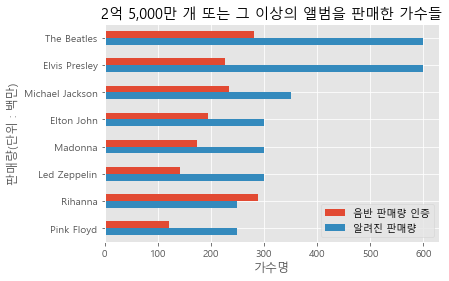

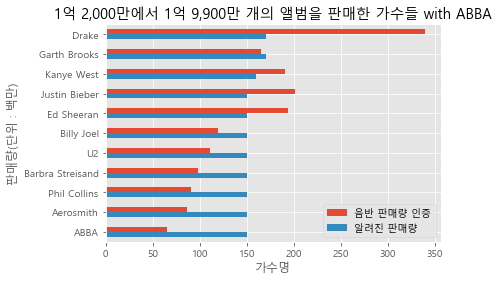

In [13]:
plt.style.use("ggplot")

# 가수명을 확인하기 쉽도록 bar가 아닌 barh 사용.
ft = first_table.plot(kind="barh")

# 판매량이 많은 가수들이 위로 오도록 정렬.
ft.invert_yaxis()

plt.title('2억 5,000만 개 또는 그 이상의 앨범을 판매한 가수들')
plt.xlabel('가수명')
plt.ylabel('판매량(단위 : 백만)')

# 120 million to 199 million records table에서는 ABBA까지만 나오도록 slicing하기.
at = abba_table[:11].plot(kind='barh')
at.invert_yaxis()


plt.title('1억 2,000만에서 1억 9,900만 개의 앨범을 판매한 가수들 with ABBA')
plt.xlabel('가수명')
plt.ylabel('판매량(단위 : 백만)')